# Problem Set 3, due May 8 at 3:30 pm

### Before You Start

Make sure the following libraries load correctly.  Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python! Part 1 will be relatively easy; Part 2 will take more time.

*Also note:* please use base **matplotlib** - not Seaborn or other packages. This will help you become familiar with techniques for maintaining fine-grained control over your data visualizations. It will also help our graders, who spent countless hours trying to make various versions import for grading.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  
%matplotlib inline  
from functools import reduce

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:


In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()
print (bdata.data.shape)
print (bdata.DESCR)

(506, 13)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by t

---

## Part 1: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.
Before beginning the "real" work, familiarize yourself with the
dataset.  Analyze basic summary of the variables, plot histogram of
house price values, etc.

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506,)
14
506
35
0
        CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
283  0.01501  90.0   1.21   1.0  0.401  7.923   24.8  5.8850   1.0  198.0   
225  0.52693   0.0   6.20   0.0  0.504  8.725   83.0  2.8944   8.0  307.0   
369  5.66998   0.0  18.10   1.0  0.631  6.683   96.8  1.3567  24.0  666.0   
370  6.53876   0.0  18.10   1.0  0.631  7.016   97.5  1.2024  24.0  666.0   
371  9.23230   0.0  18.10   0.0  0.631  6.216  100.0  1.1691  24.0  666.0   

     PTRATIO       B  LSTAT  MEDV  
283     13.6  395.52   3.16  50.0  
225     17.4  382.00   4.63  50.0  
369     20.2  375.33   3.73  50.0  
370     20.2  392.05   2.96  50.0  
371     20.2  366.15   9.53  50.0  

     MEDV
283  50.0
15
        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
372  8.26725  0.0   18.1   1.0  0.668  5.875  89.6  1.1296  

/home/kriarvi95/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


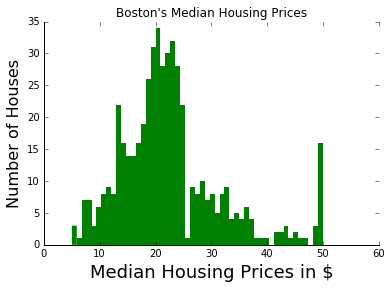

In [3]:
# ...
print (bdata.keys())
print (bdata.feature_names)
print (bdata.target.shape)
boston = pd.DataFrame(bdata.data)
boston.columns = bdata.feature_names[:]
boston['MEDV'] = bdata.target
print (len(boston.columns))
print (len(boston.index))
print (len(boston.loc[boston['CHAS'] == 1]))
print (boston.isnull().values.ravel().sum())
print (boston.sort_values('MEDV', ascending=False).head(5))


print()
print (boston[['MEDV']].sort_values('MEDV', ascending=False).head(1))
print (len(boston.loc[boston['RM'] < 5]))
print (boston.loc[boston['CHAS'] == 1].sort_values(by=('TAX'), ascending=False).head(1))
print()
print (boston[['CRIM', 'MEDV']].sort_values(by=('MEDV'), ascending=False).head(1))
print()
print (boston[['CRIM', 'MEDV']].sort_values(by=('MEDV'), ascending=True).head(1))


# Creating Table
cols = (boston.columns).tolist()

firstCol = [ len(boston[x]) for x in cols ]  # I love List Comprehensions
secondCol = [ round(boston[x].mean(), 2) for x in cols]
thirdCol = [ round(boston[x].std(), 2) for x in cols]
fourthCol = [ round(boston[x].min(),2) for x in cols]
fifthCol = [ round(boston[x].median(),2) for x in cols]
sixthCol = [ round(boston[x].max(),2) for x in cols]

#rowsAsCols = np.column_stack(([ round(elem, 2) for elem in firstRow ], [ round(elem, 2) for elem in secondRow ], [ round(elem, 2) for elem in thirdRow ], [ round(elem, 2) for elem in fourthRow ], [ round(elem, 2) for elem in fifthRow ], [ round(elem, 2) for elem in sixthRow ]))

#print (firstRow)
#print (secondRow)
#print (thirdRow)
#print (fourthRow)
#print (fifthRow)
#print (sixthRow)


index = ['Name', 'Number of Non-Missing Values', 'Mean', 'Standard Deviation', 'Min', 'Median', 'Max']

# Create DataFrame and insert lists as columns

table = pd.DataFrame({'Name': cols, 'Number of Non-Missing Values': firstCol, 'Mean': secondCol, 'Standard Deviation': thirdCol, 'Min': fourthCol, 'Median': fifthCol, 'Max':sixthCol})

# Set Index to be at 1
table.index += 1

# Reorder columns to adhere to required format
table = table[index]

table
#table.loc['Number of Non-Missing Values'] = pd.Series(dict(zip(cols, firstCol)))


# prepare IPython to work with matplotlib and import the library to something convenient
# %matplotlib inline  
import matplotlib.pyplot as plt  

data = bdata.target

# edit the code below to make the graph look good
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.hist(data, color = 'g', edgecolor = "none", bins=51)
plt.title("Boston's Median Housing Prices")
plt.xlabel('Median Housing Prices in $', fontsize=18)
plt.ylabel('Number of Houses', fontsize=16)
plt.legend()
plt.show()

### 1.1: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional. No excuses if you don't get it right this time around!


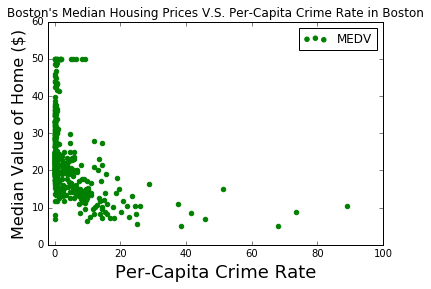

Correlation of Median Housing and Per-Capita Crime:  -0.385831689884


In [4]:
# ...
plt.scatter(boston['CRIM'], boston['MEDV'], color='g')
plt.title("Boston's Median Housing Prices V.S. Per-Capita Crime Rate in Boston")
plt.xlabel('Per-Capita Crime Rate', fontsize=18)
plt.ylabel('Median Value of Home ($)', fontsize=16)
plt.xlim(-2,100)
plt.legend()
plt.show()

print("Correlation of Median Housing and Per-Capita Crime: ", np.corrcoef(boston['CRIM'],boston['MEDV'])[1,0])

### 1.2 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. 
Details of RMSE can be found in Hastie, Tibishrani, Friedman _The
Elements of Statistical Learning_, Ch 2.5. (Available on the web)


In [5]:
#Calculates the root mean square of a list; intended to be used for RMSE by passing in a list of errors.
def compute_rmse(inputList):
        squares = [x ** 2 for x in inputList]
        return np.sqrt(reduce(lambda x, y: x + y, squares) / len(squares))

#Testing
test = compute_rmse([-2, 5, -8, 9, -4])
print(test)

6.16441400297


### 1.3 Divide your data into training and testing datasets

Randomly select 66% of the data and put this in a training dataset
(call this "bdata_train"), and place the remaining 34% in a testing
dataset (call this "bdata_test").  Please us 'np.random' for random numbers.


In [6]:
# Please use this seed, it will help ensure that your "random" split is the same "random" split used by the rest of the class
seed = np.random.seed(seed=13579)

bdata_train, bdata_test, y_train, y_test = train_test_split(bdata.data, bdata.target, test_size=0.34, random_state=seed)
# bdata_train, bdata_test = train_test_split(bdata.data, test_size=0.34, random_state=seed)

### 1.4 Use a very bad baseline for prediction, and compute RMSE

Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [7]:
#baseline model - average value of mhv on training data

# print(bdata_train)
# print(type(bdata_train))

averageOfMedianHousePrices = np.mean(y_train)

modelTrain = 0 * y_train + averageOfMedianHousePrices
modelTest = 0 * y_test + averageOfMedianHousePrices


####Computing RMSE ON TRAINING DATASET

#print(list((y - bdata_train).flatten()))
rmseTrain = compute_rmse(modelTrain-y_train)

print("RMSE TRAINING: " + str(rmseTrain))


####Computing RMSE ON TESTING DATASET

rmseTest = compute_rmse(modelTest-y_test)

print("RMSE TESTING: " + str(rmseTest)) 

RMSE TRAINING: 9.43068967879
RMSE TESTING: 8.74957418914


This is about what I expected because the rmse of the model was poor so it should most likely carry the same poor accuracy over to the testing data set, although interestingly the error decreased by 0.68. Garbage in is Garbage out, in other words.

---

## Part 2: Nearest Neighbors


### 2.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average
Value" baseline that you computed above.  Soon you will implement the
Nearest Neighbor algorithm, but first you need to create a distance
metric to measure the distance (and similarity) between two instances.
Write a generic function to compute the Lp-Norm distance. Verify that
your function works by computing the L-2 (Euclidean) distance and L-1 (Manhattan) distance between the points (3,4) and (6,8), and between (6,8) and (3,4).  Ensure that your distance is correct and positive in both cases!

In [8]:
## build on this...
def distance(x1, x2, L):
    return (sum([(np.absolute((X1 - X2))**L) for X1, X2 in zip(x1, x2)]) ** (1 / L))
    
#TESTING
pointA = [3,4]
pointB = [6,8]

l2FirstTest = distance(pointA, pointB, 2)
print("L2 w/ [3,4] first: " + str(l2FirstTest))
l1FirstTest = distance(pointA, pointB, 1)
print("L1 w/ [3,4] first: " + str(l1FirstTest))
print()

l2SecondTest = distance(pointB, pointA, 2)
print("L2 w/ [6,8] first: " + str(l2SecondTest))
l1SecondTest = distance(pointB, pointA, 1)
print("L2 w/ [6,8] first: " + str(l1SecondTest))
print()

l2OptionalTest = distance(pointA, pointA, 2)
print("L2 SANITY W/ Same points: " + str(l2OptionalTest))
l1OptionalTest = distance(pointA, pointA, 1)
print("L1 SANITY W/ Same points: " + str(l1OptionalTest))


L2 w/ [3,4] first: 5.0
L1 w/ [3,4] first: 7.0

L2 w/ [6,8] first: 5.0
L2 w/ [6,8] first: 7.0

L2 SANITY W/ Same points: 0.0
L1 SANITY W/ Same points: 0.0


### 2.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as
you know, with Nearest Neighbors there is no real training, you just
need to keep your training data in memory.  Write a function that
predicts, for each instance in the testing data (bdata_test), the
median home value using the nearest neighbor algorithm we discussed in
class.  Since this is a small dataset, you can simply compare your
test instance to every instance in the training set, and return the
MEDV value of the closest training instance.  You can just loop over
the instances to find the nearest neighbor.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

Plot the true vs predicted price for your test data

CRIM and RM Train: (333, 2)
CRIM and RM Test: (173, 2)
MEDV Train: (333,)
MEDV Test: (173,)

RMSE with 1 nearest neighbor: 5.741


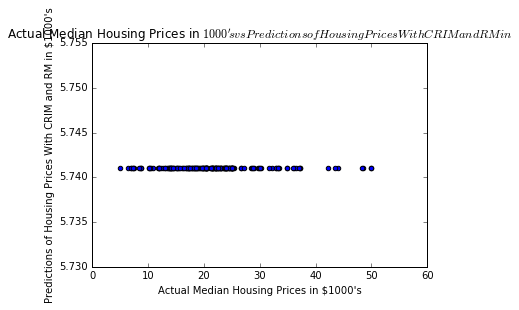

In [9]:
basicdata_train = np.array([np.array([bdata_train[i][0], bdata_train[i][5]]) for i in list(range(len(bdata_train)))])
basicdata_test = np.array([np.array([bdata_test[i][0], bdata_test[i][5]]) for i in list(range(len(bdata_test)))])

print("CRIM and RM Train: " + str(basicdata_train.shape))
print("CRIM and RM Test: " + str(basicdata_test.shape))
print("MEDV Train: " + str(y_train.shape))
print("MEDV Test: " + str(y_test.shape))
print()

## build on this...
#Used this as a reference: 
import operator 
#CRIM IS the 0th index element and RM is the 5th index element
def nneighbor(bdata_train, bdata_test, y_train, y_test, L, k):
    predictions=[]
    for x in range(len(bdata_test)):
        neighbors = getNeighbors(bdata_train, bdata_test[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
    return predictions
    
def getNeighbors(bdata_train, bdata_test, k):
    distances = []
    length = len(bdata_test)-1
    
#     print(length)
#     print("bdata_train: " + str(type(bdata_train)))
#     print("bdata_test: " + str(type(bdata_test)))
        
    for x in range(len(bdata_train)):
        dist = distance(list(bdata_train), list(bdata_test), 2)
        distances.append((bdata_train[x], dist))
    distances = sorted(distances, key=lambda x: x[1].all())
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors
    
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=lambda x: x[1], reverse=True)
    return sortedVotes[0][0]

predictions = nneighbor(basicdata_train, basicdata_test, y_train, y_test, 2, 1)
RMSENearestNeighbor = compute_rmse(predictions)
print("RMSE with 1 nearest neighbor: " + str(RMSENearestNeighbor))

plt.scatter(y_test, predictions)
plt.title("Actual Median Housing Prices in $1000's vs Predictions of Housing Prices With CRIM and RM in $")
plt.xlabel("Actual Median Housing Prices in $1000's")
plt.ylabel("Predictions of Housing Prices With CRIM and RM in $1000's")
plt.show()

### 2.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Normalization is similar to Mahalanobis distance (if the features are independent).  Read more in Daume (2017), _A Course in Machine Learning_ Chapter 4.3.  Write a simple generic normalization function that takes as input an array of values for a given feature, and returns the normalized array.  Do it well, you will need it in the future as well ;-)

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [10]:
## ...
def normalize(toNormalize):
    mu = np.mean(toNormalize)
    sigma = np.std(toNormalize)
    return np.array([((x - mu) / sigma) for x in toNormalize])


print(np.round(normalize([-5, 6, 9, 2, 4]),2) == [-1.74, 0.59, 1.23, -0.25, 0.17])
print()

normalizedBasicdata_train = normalize(basicdata_train)
normalizedBasicdata_test = normalize(basicdata_test)

NormalizedRMSENearestNeighbor = compute_rmse(nneighbor(normalizedBasicdata_train, normalizedBasicdata_test, y_train, y_test, 2, 1))
print("Normalized RMSE with 1 nearest neighbor: " + str(NormalizedRMSENearestNeighbor))

[ True  True  True  True  True]

Normalized RMSE with 1 nearest neighbor: 0.140556953754


What do you find?

When I normalized it using the best-practices approach detailed in the NOTE, we found that with Normalization, the error is far smaller.

### 2.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!  

What combination of features and distance function provide the lowest RMSE?  Compre RMSEs with the corresponding true-predicted plots.

Do your decisions affect the running time of the algorithm?

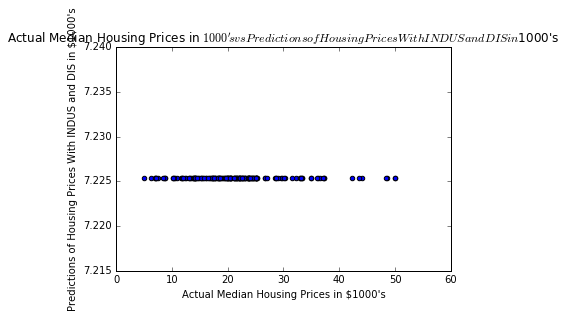

Two Features RMSE with 1 nearest neighbor: 7.2254



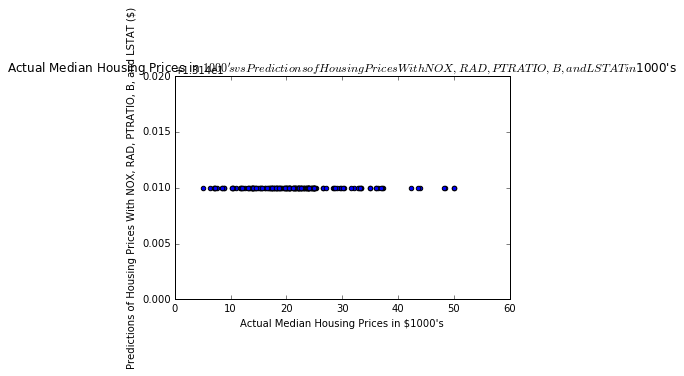

More than four features RMSE with 1 nearest neighbor: 13.15



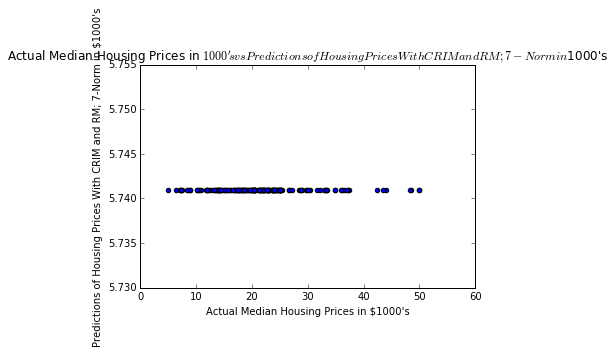

RMSE with 1 nearest neighbor with the 7-norm: 5.741


In [11]:
'''
00 - CRIM     per capita crime rate by town
01 - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
02 - INDUS    proportion of non-retail business acres per town
03 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
04 - NOX      nitric oxides concentration (parts per 10 million)
05 - RM       average number of rooms per dwelling
06 - AGE      proportion of owner-occupied units built prior to 1940
07 - DIS      weighted distances to five Boston employment centres
08 - RAD      index of accessibility to radial highways
09 - TAX      full-value property-tax rate per $10,000
10 - PTRATIO  pupil-teacher ratio by town
11 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
12 - LSTAT    % lower status of the population
'''
## do it here...

twoFeaturesData_train = np.array([np.array([bdata_train[i][2], bdata_train[i][7]]) for i in list(range(len(bdata_train)))])
twoFeaturesData_test = np.array([np.array([bdata_test[i][2], bdata_test[i][7]]) for i in list(range(len(bdata_test)))])

twoFeaturesPredictions = nneighbor(twoFeaturesData_train, twoFeaturesData_test, y_train, y_test, 2, 1)
plt.scatter(y_test, twoFeaturesPredictions)
plt.title("Actual Median Housing Prices in $1000's vs Predictions of Housing Prices With INDUS and DIS in $1000's")
plt.xlabel("Actual Median Housing Prices in $1000's")
plt.ylabel("Predictions of Housing Prices With INDUS and DIS in $1000's")
plt.show()
twoFeaturesRMSENearestNeighbor = compute_rmse(twoFeaturesPredictions)
print("Two Features RMSE with 1 nearest neighbor: " + str(twoFeaturesRMSENearestNeighbor))
print()


fourPlusFeaturesData_train = np.array([np.array([bdata_train[i][4], bdata_train[i][8], bdata_train[i][10], bdata_train[i][11], bdata_train[i][12]]) for i in list(range(len(bdata_train)))])
fourPlusFeaturesData_test = np.array([np.array([bdata_test[i][4], bdata_test[i][8], bdata_test[i][10], bdata_test[i][11], bdata_test[i][12]]) for i in list(range(len(bdata_test)))])

fourPlusFeaturesPredictions = nneighbor(fourPlusFeaturesData_train, fourPlusFeaturesData_test, y_train, y_test, 2, 1)
plt.scatter(y_test, fourPlusFeaturesPredictions)
plt.title("Actual Median Housing Prices in $1000's vs Predictions of Housing Prices With NOX, RAD, PTRATIO, B, and LSTAT in $1000's")
plt.xlabel("Actual Median Housing Prices in $1000's")
plt.ylabel("Predictions of Housing Prices With NOX, RAD, PTRATIO, B, and LSTAT ($)")
plt.show()
fourPlusFeaturesRMSENearestNeighbor = compute_rmse(fourPlusFeaturesPredictions)
print("More than four features RMSE with 1 nearest neighbor: " + str(fourPlusFeaturesRMSENearestNeighbor))
print()


sevenNormPredictions = nneighbor(basicdata_train, basicdata_test, y_train, y_test, 7, 1)
plt.scatter(y_test, sevenNormPredictions)
plt.title("Actual Median Housing Prices in $1000's vs Predictions of Housing Prices With CRIM and RM; 7-Norm in $1000's")
plt.xlabel("Actual Median Housing Prices in $1000's")
plt.ylabel("Predictions of Housing Prices With CRIM and RM; 7-Norm in $1000's")
plt.show()
RMSENearestNeighbor7norm = compute_rmse(sevenNormPredictions)
print("RMSE with 1 nearest neighbor with the 7-norm: " + str(RMSENearestNeighbor7norm))

Total Run Time of twoFeaturesPredictions 7.2 seconds.



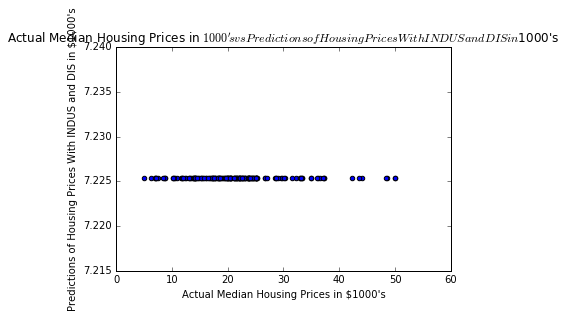

Two Features RMSE with 1 nearest neighbor: 7.2254

Total Run Time of fourPlusFeaturesPredictions 9.59 seconds.



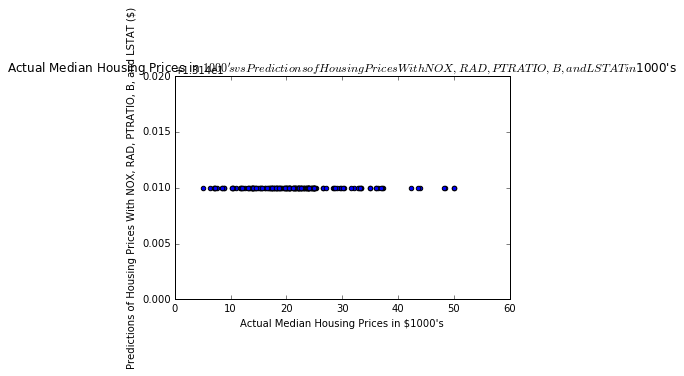

More than four features RMSE with 1 nearest neighbor: 13.15

Total Run Time of sevenNormPredictions 9.05 seconds.



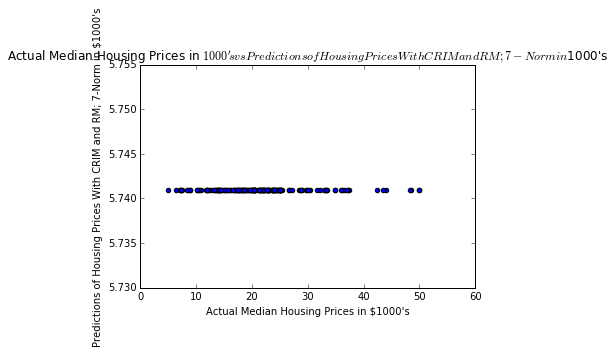

RMSE with 1 nearest neighbor with the 7-norm: 5.741


In [14]:
'''
00 - CRIM     per capita crime rate by town
01 - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
02 - INDUS    proportion of non-retail business acres per town
03 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
04 - NOX      nitric oxides concentration (parts per 10 million)
05 - RM       average number of rooms per dwelling
06 - AGE      proportion of owner-occupied units built prior to 1940
07 - DIS      weighted distances to five Boston employment centres
08 - RAD      index of accessibility to radial highways
09 - TAX      full-value property-tax rate per $10,000
10 - PTRATIO  pupil-teacher ratio by town
11 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
12 - LSTAT    % lower status of the population
'''
## do it here...

twoFeaturesData_train = np.array([np.array([bdata_train[i][2], bdata_train[i][7]]) for i in list(range(len(bdata_train)))])
twoFeaturesData_test = np.array([np.array([bdata_test[i][2], bdata_test[i][7]]) for i in list(range(len(bdata_test)))])

start_time = time.time()
twoFeaturesPredictions = nneighbor(twoFeaturesData_train, twoFeaturesData_test, y_train, y_test, 2, 1)
print("Total Run Time of twoFeaturesPredictions " + str(round(time.time() - start_time, 2)) + " seconds.")
print()

plt.scatter(y_test, twoFeaturesPredictions)
plt.title("Actual Median Housing Prices in $1000's vs Predictions of Housing Prices With INDUS and DIS in $1000's")
plt.xlabel("Actual Median Housing Prices in $1000's")
plt.ylabel("Predictions of Housing Prices With INDUS and DIS in $1000's")
plt.show()
twoFeaturesRMSENearestNeighbor = compute_rmse(twoFeaturesPredictions)
print("Two Features RMSE with 1 nearest neighbor: " + str(twoFeaturesRMSENearestNeighbor))
print()


fourPlusFeaturesData_train = np.array([np.array([bdata_train[i][4], bdata_train[i][8], bdata_train[i][10], bdata_train[i][11], bdata_train[i][12]]) for i in list(range(len(bdata_train)))])
fourPlusFeaturesData_test = np.array([np.array([bdata_test[i][4], bdata_test[i][8], bdata_test[i][10], bdata_test[i][11], bdata_test[i][12]]) for i in list(range(len(bdata_test)))])

start_time = time.time()
fourPlusFeaturesPredictions = nneighbor(fourPlusFeaturesData_train, fourPlusFeaturesData_test, y_train, y_test, 2, 1)
print("Total Run Time of fourPlusFeaturesPredictions " + str(round(time.time() - start_time, 2)) + " seconds.")
print()

plt.scatter(y_test, fourPlusFeaturesPredictions)
plt.title("Actual Median Housing Prices in $1000's vs Predictions of Housing Prices With NOX, RAD, PTRATIO, B, and LSTAT in $1000's")
plt.xlabel("Actual Median Housing Prices in $1000's")
plt.ylabel("Predictions of Housing Prices With NOX, RAD, PTRATIO, B, and LSTAT ($)")
plt.show()
fourPlusFeaturesRMSENearestNeighbor = compute_rmse(fourPlusFeaturesPredictions)
print("More than four features RMSE with 1 nearest neighbor: " + str(fourPlusFeaturesRMSENearestNeighbor))
print()


start_time = time.time()
sevenNormPredictions = nneighbor(basicdata_train, basicdata_test, y_train, y_test, 7, 1)
print("Total Run Time of sevenNormPredictions " + str(round(time.time() - start_time, 2)) + " seconds.")
print()
plt.scatter(y_test, sevenNormPredictions)
plt.title("Actual Median Housing Prices in $1000's vs Predictions of Housing Prices With CRIM and RM; 7-Norm in $1000's")
plt.xlabel("Actual Median Housing Prices in $1000's")
plt.ylabel("Predictions of Housing Prices With CRIM and RM; 7-Norm in $1000's")
plt.show()
RMSENearestNeighbor7norm = compute_rmse(sevenNormPredictions)
print("RMSE with 1 nearest neighbor with the 7-norm: " + str(RMSENearestNeighbor7norm))

What do you find?

Of the three suggested approaches suggested in the directions, a new set of two features, more than four features, and the same two features with a different L, it seems that the third approach yielded the lowest RMSE with a value of 5.741. The difference between the first and third approach was 1.4844 while the difference between the second and third approach was 7.409. The plots show that all of the predictions cluster around 1 value for each plot regatdless of the actual median housing price. This suggests that we may have to increase the number of neighbors to get a better estimate.

This is about what I expected because inference on the behavior of housing markets suggests that their respective prices are valued based off the number of rooms more so than crime rate or any other variable and the L value would be irrelavant as the distance function remains a linear map regardless of it's value.

### 2.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see Daume (2017) _A Course in Machine Learning_, Ch 4.6).  Here you must implement a simple k-fold cross-validation algorithm yourself.  Essentially you have to partition your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in K-fold iterator -- do *not* use that here.)

Use Euclidean distance with CRIM and RM (0 and 5) as features.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations, and the total running time for all 10 iterations.  Compare the k-fold RMSE with the training-testing split RMSE above for the same hyperparameter values.

In [13]:
# enter your code here
from random import shuffle
import time

def k_fold_cross_validation(items, k, randomize=False):

    if randomize:
        items = list(items)
        shuffle(items)

    slices = [items[i::k] for i in range(k)]

    for i in range(k):
        validation = slices[i]
        training = [item
                    for s in slices if s is not validation
                    for item in s]
        return np.array(training), validation
        

RMSEs = []
start_time = time.time()
for _ in range(10):
    kfoldsBData_train, kfoldsBData_test = k_fold_cross_validation(basicdata_train, 10)
    RMSEs.append(nneighbor(kfoldsBData_train, kfoldsBData_test, y_train, y_test, 2, 1))
print("Total Run Time " + str(round(time.time() - start_time, 2)) + " seconds.")
print()    
print("Mean RMSE of 10 iterations of 1-NN: " + str(np.mean(RMSEs)))

Total Run Time 11.58 seconds.

Mean RMSE of 10 iterations of 1-NN: 6.145


Interestingly, the mean RMSE of 10 iterations was 0.404 more than the value I found in section 2.2.

### 2.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [ ]:
# ...
def knn(basicdata_train, y_train, y_test, folds, L, K):
    RMSEs = []
    for _ in range(folds):
        kfoldsBData_train, kfoldsBData_test = k_fold_cross_validation(basicdata_train, folds)
        RMSEs.append(compute_rmse(nneighbor(kfoldsBData_train, kfoldsBData_test, y_train, y_test, L, K)))
    return np.mean(RMSEs)

In [ ]:
# Do 10-FCV here...
tenFolds3NeighborsRMSE = knn(basicdata_train, y_train, y_test, 10, 2, 3)
print("10 Folds, 3-NN RMSE: " + str(tenFolds3NeighborsRMSE))

### 2.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

In [ ]:
'''
CRIM - 0
ZN - 1
RM - 5
AGE - 6
DIS - 7
TAX - 9
'''

# iterate over the features
complicateddata_train = np.array([np.array([bdata_train[i][0], bdata_train[i][1], bdata_train[i][5], bdata_train[i][6], bdata_train[i][7], bdata_train[i][9]]) for i in list(range(len(bdata_train)))])
normalizedComplicateddata_train = normalize(complicateddata_train)

In [ ]:
# find the best K, create a plot

RMSEsForKs = []
x = list(range(1,26))
for K in x:
    RMSEsForKs.append(knn(normalizedComplicateddata_train, y_train, y_test, 10, 2, K))

plt.scatter(x,RMSEsForKs)
plt.title("Value for K vs RMSE for Value of K predicting Median House Prices")
plt.xlabel("Value for K")
plt.ylabel("RMSE for Value of K predicting Median House Prices")
plt.show()

What do you find?

It seems that the RMSE's for the values of K fluctuate in the following pattern: from K = 1 to 6, the error is approximately 1.3. It then increases to 1.4 for K = 7 to 14. It is at it's lowest between K = 15 to 18. It reaches it's worst when K = 19 to 25.

Based on this figure, to minimize the root mean squared error for predicting median house prices of this dataset with 10 folds, it seems reasonable to use a K between one and six, to prevent both over and underfitting.  

### Extra-Credit: Forward selection

Thus far the choice of predictor variables has been rather
arbitrary. For extra credit, implement a basic (See Hastie,
Tibshirani, Friedman _Elements of statistical Learning_, Ch 3.3)
algorithm to progressively include features that decrease the
cross-validated RMSE of the model. Note that the optimal value of K
may be different for each model, so you may want to use
cross-validation to choose K each time (but it is also fine if you fix
K at the optimal value from 2.7).  Create a graph that shows RMSE as a
function of the number of features in the model. Label each point on
the x-axis with the name of the feature that is added at that step in
the forward selection algorithm.  For instance, if the optimal
single-feature model has CRIM with RMSE = 10, and the optimal
two-feature model has CRIM+ZN with RMSE=9, the first x-axis label will
say CRIM and the second x-axis lable with say ZN